## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual df rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer df, telecom companies need to predict which customers are at high risk of df.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of df and identify the main indicators of df.

# Steps Solving Problem
1. Importing Libraries
2. Loading and reading the data
3. Handling missing Values
4. EDA Univariate and Bivariate analysis
5. Model Building
6. PCA
7. PCA and logistic Regression
8. Evaluation on the test data
9. Hyperparameter Tuning- PCA and logistic regression.
10. Random Forest
11. Feature Importance
12. Extract of Intercept and coefficient from the logistic regression.
13. Final Business Insight.


## 1. Importing Library

In [1]:
#for numerical comupationand calculation
import pandas as pd
import numpy as np

#for visualisation and plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Model Building and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

## 2. Loading and Reading Data

In [2]:
# Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
#checking shape
df.shape

(99999, 226)

In [4]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
#describe
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
#Checking duplicated values
df.duplicated().sum()

0

In [7]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [8]:
df.shape

(99999, 226)

In [9]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == df.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


## 3.Handling missing values

In [10]:
# look at missing value ratio in each column
df.isnull().sum()*100/df.shape[0]

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

In [11]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [12]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [13]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [14]:
# impute missing values with 0
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [15]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(df[zero_impute].isnull().sum()*100/df.shape[1])

# summary
print("\n\nSummary statistics\n")
print(df[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [16]:
# drop id and date columns
print("Shape before dropping: ", df.shape)
df = df.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", df.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


##  Replace NaN values in categorical variables

**We will replace missing values in the categorical values with '-1' where '-1' will be a new category**

In [17]:
# replace missing values with '-1' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [18]:
# missing value ratio
print("Missing value ratio:\n")
print(df[cat_cols].isnull().sum()*100/df.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [19]:
#dropping variable with more than thersold value
initial_cols = df.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
207,aon,True
208,aug_vbc_3g,True
209,jul_vbc_3g,True
210,jun_vbc_3g,True


In [20]:
# drop columns
df = df.loc[:, include_cols]

dropped_cols = df.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-16 columns dropped.


##  Imputing missing value with the simple Imputer

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_cols = df.columns
df_imputed = imp.fit_transform(df)

In [23]:
# convert imputed numpy array to pandas dataframe
df = pd.DataFrame(df_imputed, columns=df_cols)
print(df.isnull().sum()*100/df.shape[0])

loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
loc_ic_t2o_mou    0.0
arpu_6            0.0
arpu_7            0.0
                 ... 
aon               0.0
aug_vbc_3g        0.0
jul_vbc_3g        0.0
jun_vbc_3g        0.0
sep_vbc_3g        0.0
Length: 196, dtype: float64


In [24]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

### Adding total data recharge and total recharge to get total combined recharge amount for a month

In [25]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [26]:
# calculate average recharge done by customer in June and July
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [27]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [28]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
df_filtered = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.shape

(30001, 201)

In [29]:
# delete variables created to filter high-value customers
df_filtered = df_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df_filtered.shape

(30001, 196)

### Derive df

In [30]:
# calculate total incoming and outgoing minutes of usage
df_filtered['total_calls_mou_9'] = df_filtered.total_ic_mou_9 + df_filtered.total_og_mou_9

In [31]:
# calculate 2g and 3g data consumption
df_filtered['total_internet_mb_9'] =  df_filtered.vol_2g_mb_9 + df_filtered.vol_3g_mb_9

In [32]:
# create df variable: those who have not used either calls or internet in the month of September are customers who have dfed

# 0 - not df, 1 - df
df_filtered['df'] = df_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [33]:
# delete derived variables
df_filtered = df_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [34]:
# change data type to category
df_filtered.df = df_filtered.df.astype("category")

# print df ratio
print("df Ratio:")
print(df_filtered.df.value_counts()*100/df_filtered.shape[0])

df Ratio:
0    91.863605
1     8.136395
Name: df, dtype: float64


### Calculate difference between 8th and previous months

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [35]:
df_filtered['arpu_diff'] = df_filtered.arpu_8 - ((df_filtered.arpu_6 + df_filtered.arpu_7)/2)

df_filtered['onnet_mou_diff'] = df_filtered.onnet_mou_8 - ((df_filtered.onnet_mou_6 + df_filtered.onnet_mou_7)/2)

df_filtered['offnet_mou_diff'] = df_filtered.offnet_mou_8 - ((df_filtered.offnet_mou_6 + df_filtered.offnet_mou_7)/2)

df_filtered['roam_ic_mou_diff'] = df_filtered.roam_ic_mou_8 - ((df_filtered.roam_ic_mou_6 + df_filtered.roam_ic_mou_7)/2)

df_filtered['roam_og_mou_diff'] = df_filtered.roam_og_mou_8 - ((df_filtered.roam_og_mou_6 + df_filtered.roam_og_mou_7)/2)

df_filtered['loc_og_mou_diff'] = df_filtered.loc_og_mou_8 - ((df_filtered.loc_og_mou_6 + df_filtered.loc_og_mou_7)/2)

df_filtered['std_og_mou_diff'] = df_filtered.std_og_mou_8 - ((df_filtered.std_og_mou_6 + df_filtered.std_og_mou_7)/2)

df_filtered['isd_og_mou_diff'] = df_filtered.isd_og_mou_8 - ((df_filtered.isd_og_mou_6 + df_filtered.isd_og_mou_7)/2)

df_filtered['spl_og_mou_diff'] = df_filtered.spl_og_mou_8 - ((df_filtered.spl_og_mou_6 + df_filtered.spl_og_mou_7)/2)

df_filtered['total_og_mou_diff'] = df_filtered.total_og_mou_8 - ((df_filtered.total_og_mou_6 + df_filtered.total_og_mou_7)/2)

df_filtered['loc_ic_mou_diff'] = df_filtered.loc_ic_mou_8 - ((df_filtered.loc_ic_mou_6 + df_filtered.loc_ic_mou_7)/2)

df_filtered['std_ic_mou_diff'] = df_filtered.std_ic_mou_8 - ((df_filtered.std_ic_mou_6 + df_filtered.std_ic_mou_7)/2)

df_filtered['isd_ic_mou_diff'] = df_filtered.isd_ic_mou_8 - ((df_filtered.isd_ic_mou_6 + df_filtered.isd_ic_mou_7)/2)

df_filtered['spl_ic_mou_diff'] = df_filtered.spl_ic_mou_8 - ((df_filtered.spl_ic_mou_6 + df_filtered.spl_ic_mou_7)/2)

df_filtered['total_ic_mou_diff'] = df_filtered.total_ic_mou_8 - ((df_filtered.total_ic_mou_6 + df_filtered.total_ic_mou_7)/2)

df_filtered['total_rech_num_diff'] = df_filtered.total_rech_num_8 - ((df_filtered.total_rech_num_6 + df_filtered.total_rech_num_7)/2)

df_filtered['total_rech_amt_diff'] = df_filtered.total_rech_amt_8 - ((df_filtered.total_rech_amt_6 + df_filtered.total_rech_amt_7)/2)

df_filtered['max_rech_amt_diff'] = df_filtered.max_rech_amt_8 - ((df_filtered.max_rech_amt_6 + df_filtered.max_rech_amt_7)/2)

df_filtered['total_rech_data_diff'] = df_filtered.total_rech_data_8 - ((df_filtered.total_rech_data_6 + df_filtered.total_rech_data_7)/2)

df_filtered['max_rech_data_diff'] = df_filtered.max_rech_data_8 - ((df_filtered.max_rech_data_6 + df_filtered.max_rech_data_7)/2)

df_filtered['av_rech_amt_data_diff'] = df_filtered.av_rech_amt_data_8 - ((df_filtered.av_rech_amt_data_6 + df_filtered.av_rech_amt_data_7)/2)

df_filtered['vol_2g_mb_diff'] = df_filtered.vol_2g_mb_8 - ((df_filtered.vol_2g_mb_6 + df_filtered.vol_2g_mb_7)/2)

df_filtered['vol_3g_mb_diff'] = df_filtered.vol_3g_mb_8 - ((df_filtered.vol_3g_mb_6 + df_filtered.vol_3g_mb_7)/2)

In [36]:
# let's look at summary of one of the difference variables
df_filtered['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

## Delete columns that belong to the df month (9th month)

In [37]:
# delete all variables relating to 9th month
df_filtered = df_filtered.filter(regex='[^9]$', axis=1)
df_filtered.shape

(30001, 173)

In [38]:
# extract all names that end with 9
col_9_names = df.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('df')
num_cols = [col for col in df_filtered.columns if col not in cat_cols]

### 4.EDA

In [39]:
# change columns types
df_filtered[num_cols] = df_filtered[num_cols].apply(pd.to_numeric)
df_filtered[cat_cols] = df_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [40]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


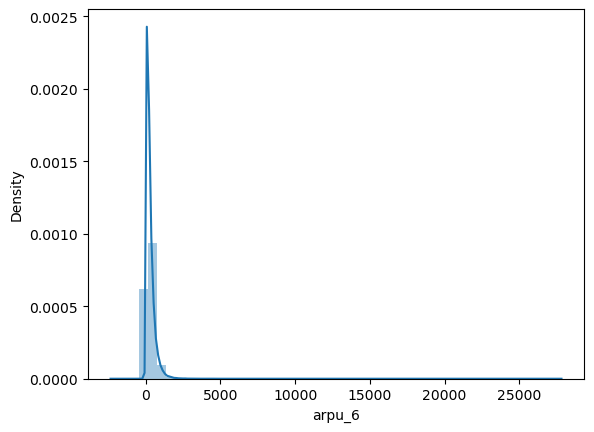

In [41]:
univariate(df.arpu_6)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


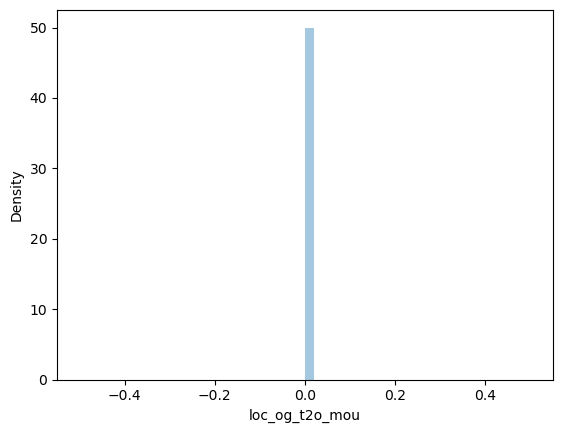

In [42]:
univariate(df.loc_og_t2o_mou)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


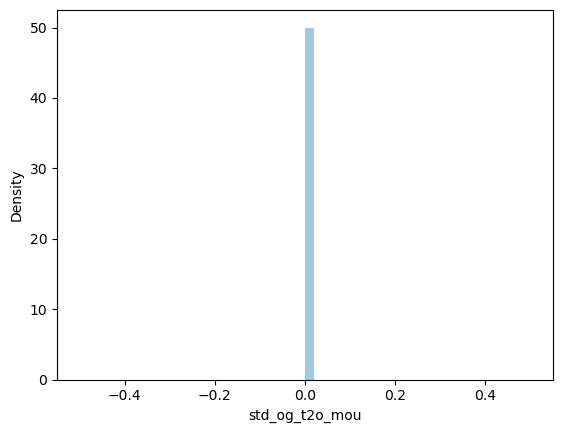

In [43]:
univariate(df.std_og_t2o_mou)

count    99999.000000
mean       133.018098
std        300.528905
min          0.000000
25%          7.410000
50%         37.160000
75%        133.018098
max      10752.560000
Name: onnet_mou_8, dtype: float64


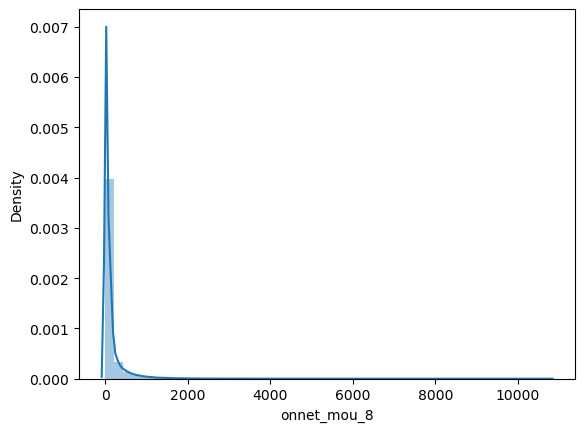

In [44]:
univariate(df.onnet_mou_8)

count    99999.000000
mean       190.337222
std        306.777984
min          0.000000
25%         31.230000
50%        101.290000
75%        202.830000
max      10310.760000
Name: offnet_mou_9, dtype: float64


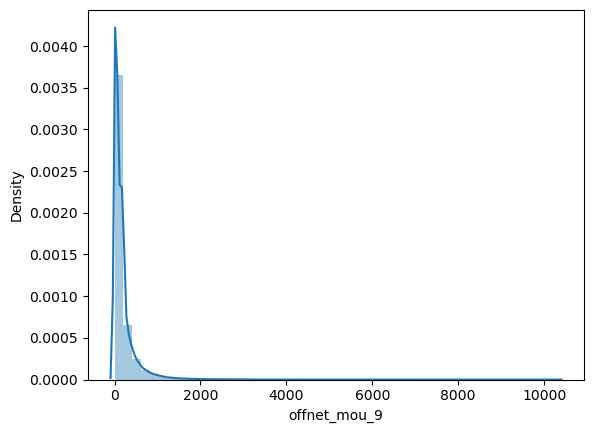

In [45]:
univariate(df.offnet_mou_9)

### Bivariate analysis

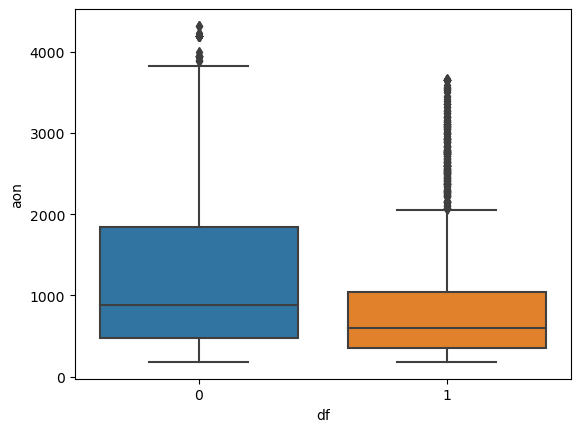

In [46]:
bivariate(df_filtered.df, df_filtered.aon)

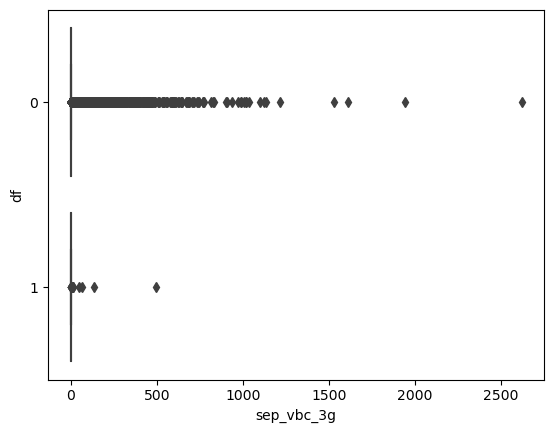

In [47]:
bivariate(df_filtered.sep_vbc_3g, df_filtered.df)

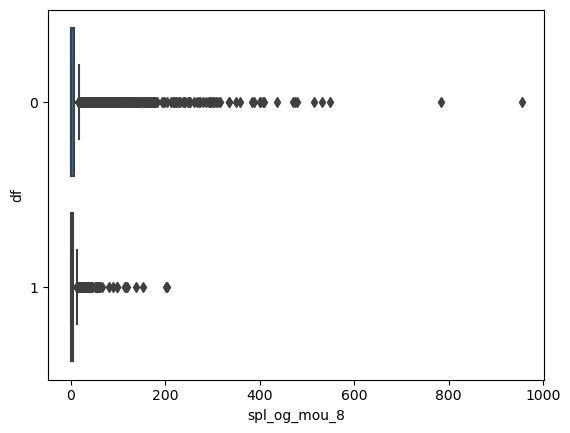

In [48]:
bivariate(df_filtered.spl_og_mou_8, df_filtered.df)

In [49]:
pd.crosstab(df_filtered.df, df_filtered.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
df,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [50]:
pd.crosstab(df_filtered.df, df_filtered.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0,25.0,27.0,29.0,30.0,38.0,41.0
df,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24972,1609,399,184,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2369,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Cap outliers in all numeric variables with k-sigma technique

In [51]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [52]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [53]:
# cap outliers in the numeric columns
df_filtered[num_cols] = df_filtered[num_cols].apply(cap_outliers, axis=0)

## 5. Building Model

In [54]:
# change df to numeric
df_filtered['df'] = pd.to_numeric(df_filtered['df'])

### Train Test split

In [55]:
# divide data into train and test
X = df_filtered.drop("df", axis = 1)
y = df_filtered.df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [56]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22500, 172)
(22500,)
(7501, 172)
(7501,)


## Aggregating the categorical columns

In [57]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').df.mean()
train.groupby('night_pck_user_7').df.mean()
train.groupby('night_pck_user_8').df.mean()
train.groupby('fb_user_6').df.mean()
train.groupby('fb_user_7').df.mean()
train.groupby('fb_user_8').df.mean()

fb_user_8
-1.0    0.141108
0.0     0.066887
1.0     0.024463
Name: df, dtype: float64

In [58]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [59]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['df']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  22500 non-null  category
 1   night_pck_user_7  22500 non-null  category
 2   night_pck_user_8  22500 non-null  category
 3   fb_user_6         22500 non-null  category
 4   fb_user_7         22500 non-null  category
 5   fb_user_8         22500 non-null  category
dtypes: category(6)
memory usage: 308.4 KB


### 6.PCA

In [60]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [61]:
pca.fit(X_train)
df_pca = pca.fit_transform(X_train)

In [62]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.42
1       20.82
2       26.57
3       31.42
4       35.45
        ...  
167    100.00
168    100.00
169    100.00
170    100.00
171    100.00
Length: 172, dtype: float64


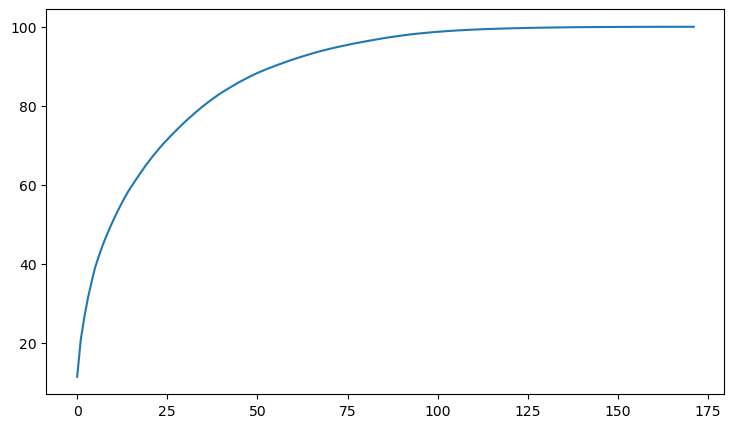

In [63]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## 7.PCA and Logistic Regression

In [64]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [65]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8076444444444445

### 8. Evaluate on test data

In [66]:
# predict df on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5488 1403]
 [  92  518]]
Sensitivity: 	0.85
Specificity: 	0.8
AUC:    	 0.89


## 9.Hyperparameter tuning - PCA and Logistic Regression

In [67]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: df, dtype: float64

In [68]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [69]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [70]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.239632,0.051159,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,1.628383,0.099950,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
2,1.295541,0.097902,0.060248,0.021438,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.880900,0.865525,0.875435,0.895593,0.869901,0.877471,0.010434,15
3,1.675142,0.087108,0.059378,0.015729,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.885272,0.869252,0.877115,0.897080,0.877173,0.881178,0.009428,3
4,1.116857,0.060772,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
5,1.446859,0.044388,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
6,1.201079,0.065661,0.057389,0.013574,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.880957,0.865124,0.876316,0.894589,0.870185,0.877434,0.010120,16
7,1.734845,0.077594,0.068097,0.025384,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.885481,0.870010,0.877255,0.895942,0.877281,0.881194,0.008852,2
8,1.139688,0.090492,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
9,1.470876,0.041091,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23


In [71]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.881259745671177
Best hyperparameters:  {'logistic__C': 4, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [72]:
# predict df on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5763 1128]
 [ 105  505]]
Sensitivity: 	0.83
Specificity: 	0.84
AUC:    	 0.9


## 10.Random Forest

In [73]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['sqrt', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [74]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 0.4]},
             scoring='roc_auc', verbose=1)

In [75]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9283717966765804
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [76]:
# predict df on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6782  109]
 [ 311  299]]
Sensitivity: 	0.49
Specificity: 	0.98
AUC:    	 0.93


## Choosing best features

In [77]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [78]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.8s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [79]:
# OOB score
rf_model.oob_score_

0.9430666666666667

In [80]:
# predict df on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6799   92]
 [ 326  284]]
Sensitivity: 	0.47
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


## 11.Feature Importance

In [81]:
# predictors
features = df_filtered.drop('df', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,6.526987
1,roam_og_mou_8,5.027694
2,total_og_mou_8,3.752686
3,roam_ic_mou_8,3.320865
4,arpu_8,2.996393
...,...,...
167,std_og_t2c_mou_8,0.000000
168,std_ic_t2o_mou_8,0.000000
169,std_og_t2o_mou,0.000000
170,std_ic_t2o_mou_6,0.000000


### Extracting top 30 features

In [82]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

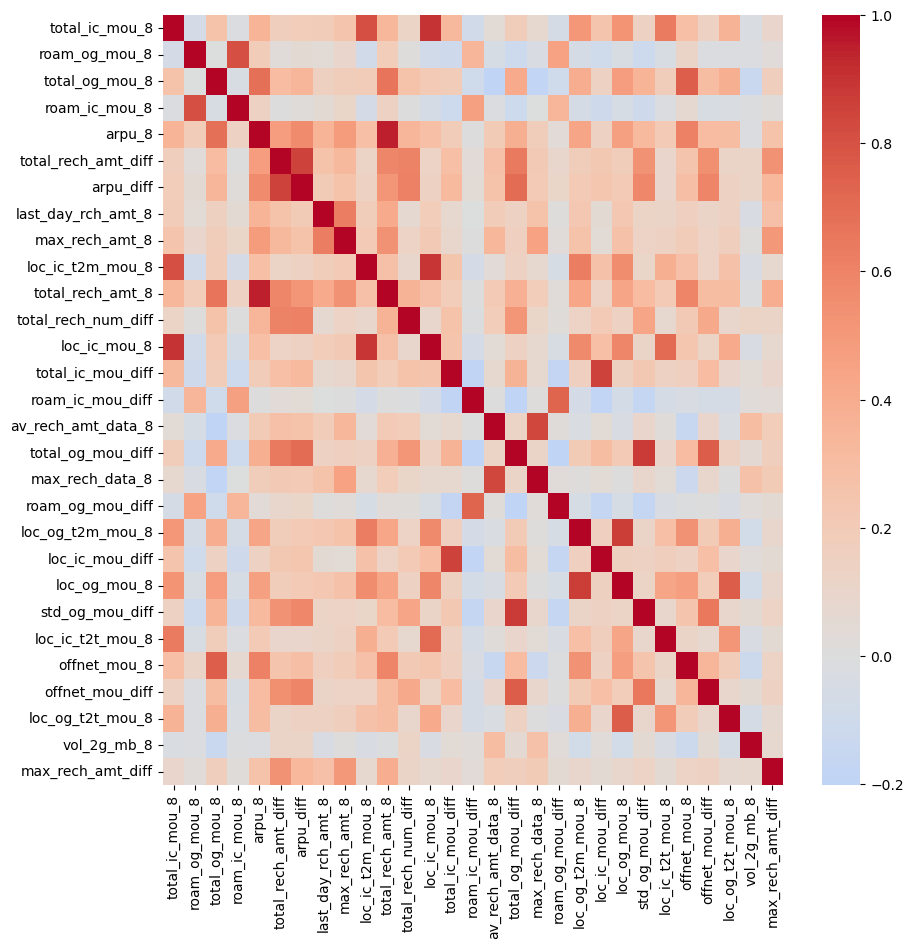

In [98]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
sns.heatmap(data=X_train[top_features].corr(), center=0.0,cmap="coolwarm")

In [99]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [100]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [101]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [102]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8825870171450745
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [103]:
# predict df on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5780 1111]
 [ 125  485]]
Sensitivity: 	0.8
Specificity: 	0.84
ROC:    	 0.89


## 12.Extract the intercept and the coefficients from the logistic model 

In [104]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [105]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [106]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [107]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.597897,-0.865688,-0.699139,-2.406123,0.326068,-0.021768,0.238346,0.141701,-0.791442,1.732919


## Final- Business Insights

* Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
* The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 